# Linear Regression

In [41]:
# Suppress the warnings
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tools.sm_exceptions import ValueWarning
warnings.simplefilter('ignore', ValueWarning)

In [1]:
#import libraries
import pandas as pd
import numpy as np
from numpy import sqrt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,explained_variance_score
from sklearn.linear_model import LinearRegression,Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve)
from sklearn.tree import DecisionTreeRegressor
from statsmodels.tools.eval_measures import mse, rmse
from sklearn import preprocessing

In [2]:
#Read in the ccombined data
finnish = pd.read_csv("finnish_data_combined.csv")
irish = pd.read_csv("irish_data_combined.csv")
irish.pop("Unnamed: 0")
finnish.pop("Unnamed: 0")

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
21    21
22    22
23    23
24    24
25    25
26    26
27    27
Name: Unnamed: 0, dtype: int64

## Correlation and linear regression

In [3]:
correlation = irish.corr()
print(correlation)

                               House Construction Cost Index  No. of Units
House Construction Cost Index                       1.000000      0.994114
No. of Units                                        0.994114      1.000000


In [4]:
correlation = finnish.corr()
print(correlation)

                                            Year     Total    Labour  \
Year                                    1.000000  0.985760  0.984753   
Total                                   0.985760  1.000000  0.988860   
Labour                                  0.984753  0.988860  1.000000   
Materials                               0.975261  0.996466  0.974269   
Services                                0.978155  0.978536  0.965056   
Residential buildings completion (No.)  0.602826  0.559865  0.527928   

                                        Materials  Services  \
Year                                     0.975261  0.978155   
Total                                    0.996466  0.978536   
Labour                                   0.974269  0.965056   
Materials                                1.000000  0.968573   
Services                                 0.968573  1.000000   
Residential buildings completion (No.)   0.570757  0.564205   

                                        Residential b

### Finnish data linear regression: cost index

In [5]:
y = finnish['Residential buildings completion (No.)']
X = finnish["Total"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 37)

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19,)
(9,)
(19,)
(9,)


In [8]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [9]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [10]:
#predictions
y_preds_train = lm.predict(X_train)
y_preds_test = lm.predict(X_test)

In [11]:
print("R-squared of the model in training set is: {}".format(lm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lm.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.32459040446670817
-----Test set statistics-----
R-squared of the model in test set is: -0.16505302529475196
Root mean squared error of the prediction is: 3958.340544859349
Mean absolute percentage error of the prediction is: 9.665406828190411


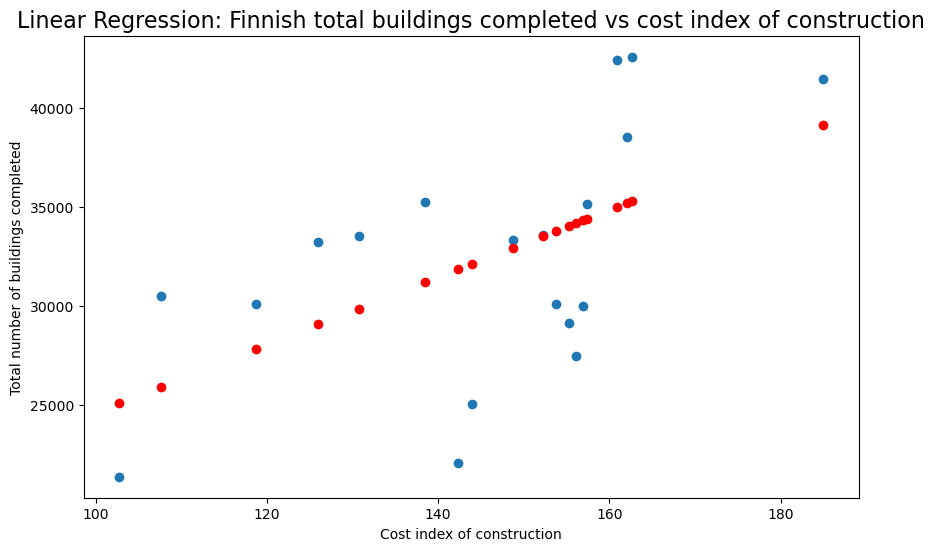

In [12]:
plt.figure(figsize=(10, 6))
plt.title("Linear Regression: Finnish total buildings completed vs cost index of construction", size=16)
plt.scatter(X_train, y_train)
plt.scatter(X_train, y_preds_train, c="red")
plt.xlabel("Cost index of construction")
plt.ylabel("Total number of buildings completed")
plt.show()

### Finnish data linear regression: year

In [13]:
y = finnish['Residential buildings completion (No.)']
X = finnish["Year"]

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 37)

In [15]:
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [16]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [17]:
#predictions
y_preds_train = lm.predict(X_train)
y_preds_test = lm.predict(X_test)

In [18]:
print("R-squared of the model in training set is: {}".format(lm.score(X_train, y_train)))
print("R-squared of the model in test set is: {}".format(lm.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

R-squared of the model in training set is: 0.3762695842027922
R-squared of the model in test set is: -0.1819921427361455
Root mean squared error of the prediction is: 3987.0125584636867
Mean absolute percentage error of the prediction is: 9.414130815070441


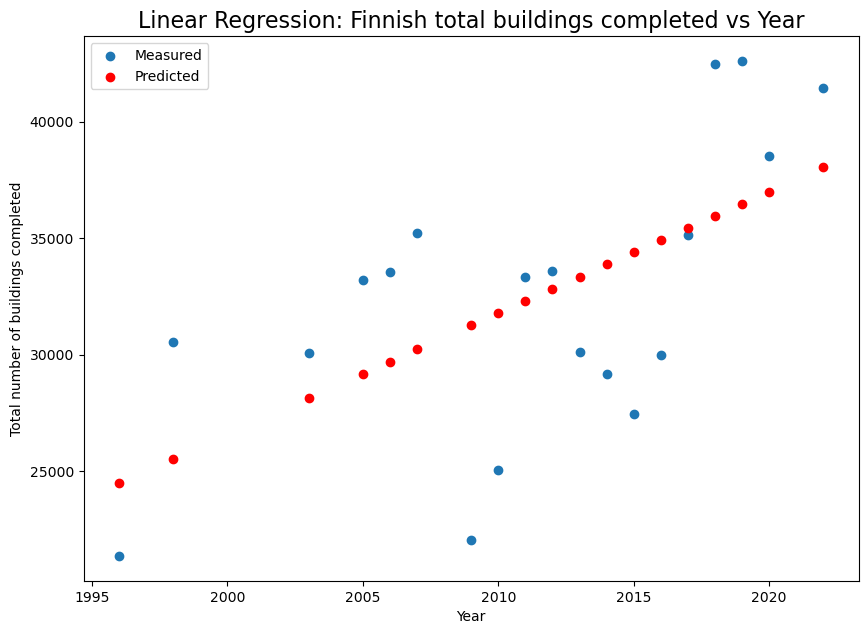

In [19]:
plt.figure(figsize=(10, 10/sqrt(2)))
plt.title("Linear Regression: Finnish total buildings completed vs Year", size=16)
plt.scatter(X_train, y_train)
plt.scatter(X_train, y_preds_train, c="red")
plt.xlabel("Year")
plt.ylabel("Total number of buildings completed")
plt.legend(['Measured', 'Predicted'])
plt.show()

### Finnish data: Ridge Regression with GridSearchCV

In [20]:
y = finnish['Residential buildings completion (No.)']
X = finnish["Year"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 37)

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

In [21]:
ridgeregr = GridSearchCV(Ridge(),
                    param_grid={
                        'alpha': [0.01, 0.1, 1, 10, 100]}, verbose=1)

ridgeregr.fit(X_train, y_train)

ridge = ridgeregr.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [22]:
ridge

Ridge(alpha=100)

In [23]:
# Making predictions here
y_preds_train = ridge.predict(X_train)
y_preds_test_ridge = ridge.predict(X_test)

print("R-squared of the model in training set is: {}".format(ridge.score(X_train, y_train)))
print("R-squared of the model in test set is: {}".format(ridge.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test_ridge)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test_ridge) / y_test)) * 100))

R-squared of the model in training set is: 0.3728291711936934
R-squared of the model in test set is: 0.031576298079045606
Root mean squared error of the prediction is: 3608.8847570264156
Mean absolute percentage error of the prediction is: 8.039658247805106


### Finnish data:  Lasso regression with GridSearchCV

In [24]:
# using GridSearch for parameter optimization
lassoregr = GridSearchCV(Lasso(),
                    param_grid={
                        'alpha': [0.01, 0.1, 1, 10, 100]}, verbose=1)

lassoregr.fit(X_train, y_train)

lasso = lassoregr.best_estimator_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [25]:
# We are making predictions here
y_preds_train = lasso.predict(X_train)
y_preds_test_lasso = lasso.predict(X_test)

print("R-squared of the model in training set is: {}".format(lasso.score(X_train, y_train)))
print("R-squared of the model in test set is: {}".format(lasso.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test_lasso)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test_lasso) / y_test)) * 100))

R-squared of the model in training set is: 0.37626398957933194
R-squared of the model in test set is: -0.17252985380375407
Root mean squared error of the prediction is: 3971.0217280732836
Mean absolute percentage error of the prediction is: 9.344967338293246


### Finnish data:  Decision Tree regression

In [26]:
DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [27]:
y_pred_DT_test = DTregressor.predict(X_test)
y_pred_DT_train = DTregressor.predict(X_train)

In [28]:
print("R-squared of the model in training set is: {}".format(DTregressor.score(X_train, y_train)))
print("R-squared of the model in test set is: {}".format(DTregressor.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(y_test, y_pred_DT_test)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_pred_DT_test) / y_test)) * 100))

R-squared of the model in training set is: 1.0
R-squared of the model in test set is: 0.22012658606684354
Root mean squared error of the prediction is: 3238.563124459845
Mean absolute percentage error of the prediction is: 9.075203638373747


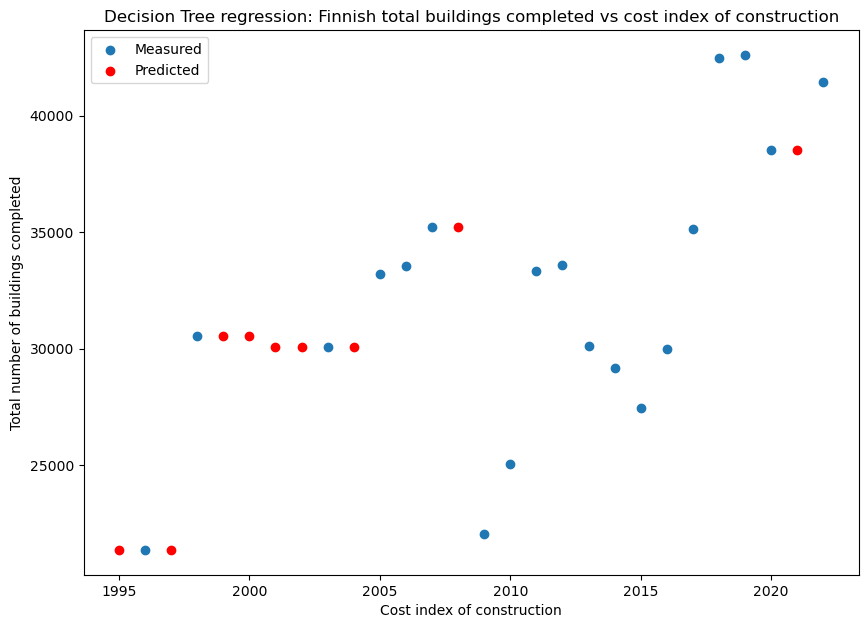

In [29]:
plt.figure(figsize=(10, 10/sqrt(2)))
plt.title("Decision Tree regression: Finnish total buildings completed vs cost index of construction", size=12)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_pred_DT_test, c="red")
plt.xlabel("Cost index of construction")
plt.ylabel("Total number of buildings completed")
plt.legend(['Measured', 'Predicted'])
plt.show()

### Finnish data:  Random Forest regression

In [30]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [31]:
y_pred_random = regressor.predict(X_test)

In [32]:
print("R-squared of the model in training set is: {}".format(regressor.score(X_train, y_train)))
print("R-squared of the model in test set is: {}".format(regressor.score(X_test, y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(y_test, y_pred_random)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_pred_random) / y_test)) * 100))

R-squared of the model in training set is: 0.9470247549154849
R-squared of the model in test set is: 0.6148196832068012
Root mean squared error of the prediction is: 2276.0004932141624
Mean absolute percentage error of the prediction is: 5.826189550773746


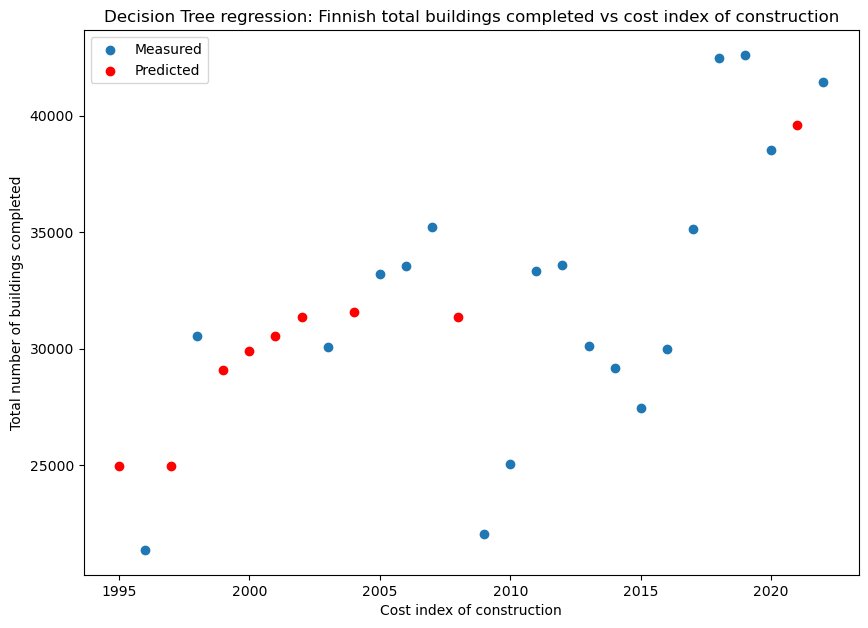

In [33]:
plt.figure(figsize=(10, 10/sqrt(2)))
plt.title("Decision Tree regression: Finnish total buildings completed vs cost index of construction", size=12)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_pred_random, c="red")
plt.xlabel("Cost index of construction")
plt.ylabel("Total number of buildings completed")
plt.legend(['Measured', 'Predicted'])
plt.show()

### Irish data linear regression: cost index

In [34]:
irish.head()

,Quarter,House Construction Cost Index,No. of Units
0,q1_2018,212.513233,14816.0
1,q1_2019,214.525667,20324.0
2,q1_2021,218.490518,34511.0
3,q2_2018,213.003957,16351.0
4,q2_2019,215.117876,22139.0


In [35]:
y = irish['No. of Units']
X = irish["House Construction Cost Index"]

In [36]:
X_train = X.values.reshape(-1,1)
y_train = y.values.reshape(-1,1)

In [37]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [38]:
#predictions
y_preds_train = lm.predict(X_train)

In [39]:
print("R-squared of the model in training set is: {}".format(lm.score(X_train, y_train)))

R-squared of the model in training set is: 0.9882631960663407


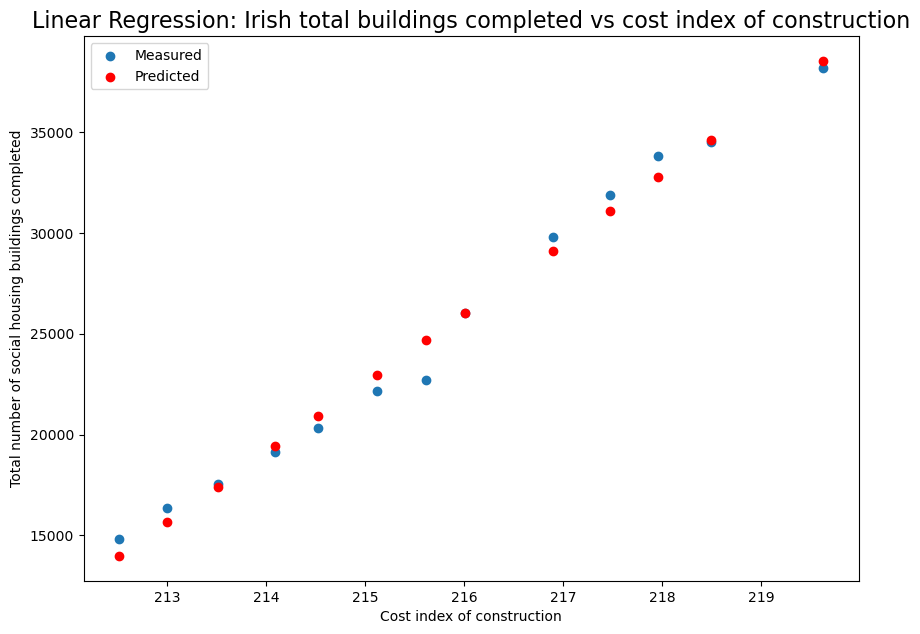

In [40]:
plt.figure(figsize=(10, 10/sqrt(2)))
plt.title("Linear Regression: Irish total buildings completed vs cost index of construction", size=16)
plt.scatter(X_train, y_train)
plt.scatter(X_train, y_preds_train, c="red")
plt.xlabel("Cost index of construction")
plt.ylabel("Total number of social housing buildings completed")
plt.legend(['Measured', 'Predicted'])
plt.show()